In [1]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../DataSets/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.Dependents = df.Dependents.replace('[+]','',regex=True).astype('float64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: >

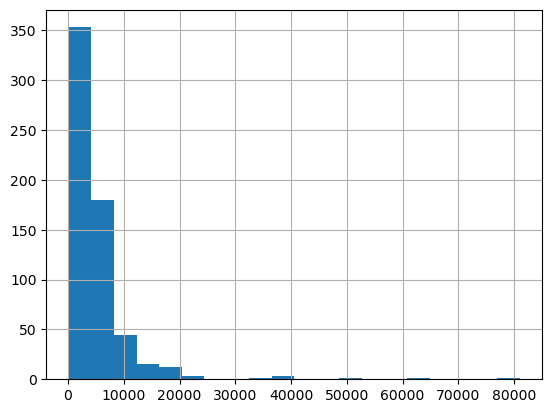

In [9]:
df['ApplicantIncome'].hist(bins=20)

In [10]:
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

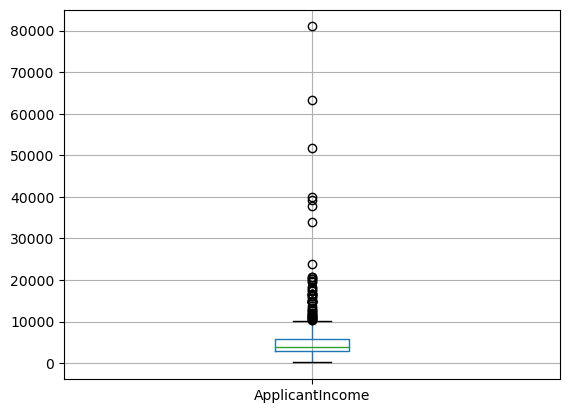

In [11]:
df.boxplot(column='ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

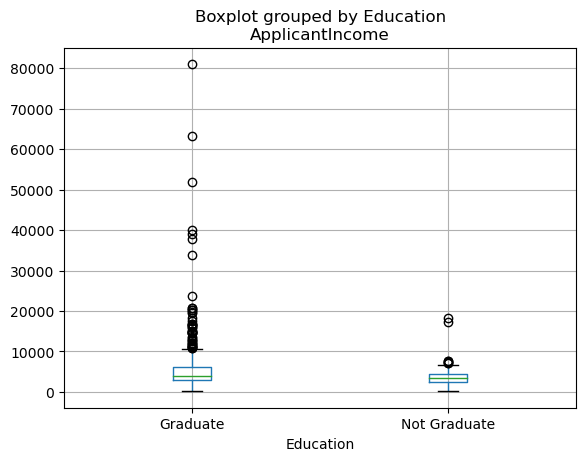

In [12]:
df.boxplot(column='ApplicantIncome',by='Education')

<Axes: >

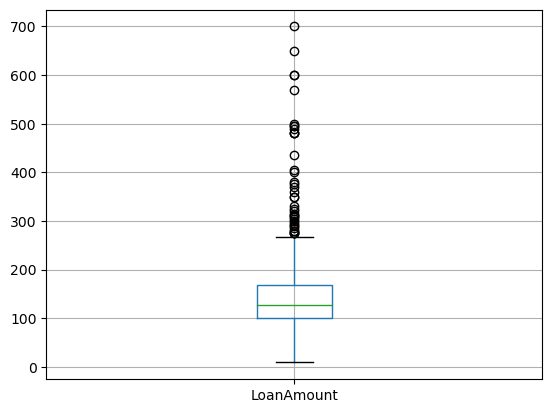

In [13]:
df.boxplot(column='LoanAmount')

<Axes: >

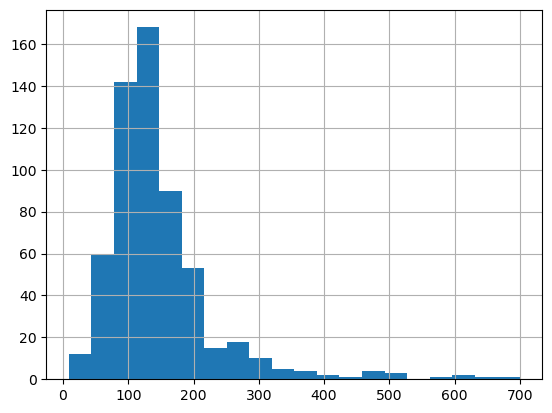

In [14]:
df['LoanAmount'].hist(bins=20)

<Axes: >

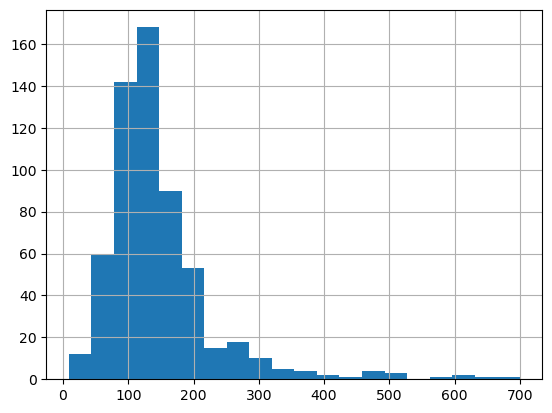

In [15]:
df['LoanAmount']-np.log(df['LoanAmount'])
df['LoanAmount'].hist(bins=20)

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [18]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [19]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [20]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [21]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

In [22]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [23]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:
df = df.drop('Loan_ID',axis=1)

In [27]:
df = pd.get_dummies(data=df,columns=['Gender','Married','Education','Property_Area','Self_Employed'])

In [28]:
df.Loan_Status = df.Loan_Status.replace({'Y':1,'N':0})

In [29]:
x = df.drop('Loan_Status',axis=1).values
y = df['Loan_Status'].values

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [32]:
yp = model.predict(xtest)
yp

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
acc = accuracy_score(ytest,yp)
acc*100

83.73983739837398

In [36]:
model_cv = RandomForestClassifier()

In [37]:
RFC_cv = cross_val_score(model_cv,x,y,cv=20,scoring='accuracy')

In [38]:
RFC_cv.mean()

0.7898924731182796

In [39]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [40]:
yp = model2.predict(xtest)
yp

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
acc = accuracy_score(ytest,yp)
acc*100


73.98373983739837

In [43]:
model_cv2 =DecisionTreeClassifier()
DTC_cv = cross_val_score(model_cv2,x,y,cv=20,scoring='accuracy')
DTC_cv.mean()

0.7112903225806451

In [44]:
from sklearn.naive_bayes import GaussianNB
model3=GaussianNB()
model3.fit(xtrain,ytrain)
yp = model3.predict(xtest)
yp
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,yp)
acc*100

83.73983739837398

In [45]:
model_cv3 =GaussianNB()
GNB_cv = cross_val_score(model_cv3,x,y,cv=20,scoring='accuracy')
GNB_cv.mean()

0.7901612903225806

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier()
model4.fit(xtrain,ytrain)

KNeighborsClassifier()

In [47]:
yp = model4.predict(xtest)
yp
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,yp)
acc*100

64.22764227642277

In [48]:
model_cv4 =KNeighborsClassifier()
KNC_cv = cross_val_score(model_cv4,x,y,cv=20,scoring='accuracy')
KNC_cv.mean()

0.622258064516129

In [49]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(xtrain,ytrain)

LogisticRegression()

In [50]:
yp = model5.predict(xtest)
yp
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,yp)
acc*100

84.5528455284553

In [51]:
model_cv5 =LogisticRegression()
LRC_cv = cross_val_score(model_cv5,x,y,cv=20,scoring='accuracy')
LRC_cv.mean()

0.7982795698924733

In [52]:
from sklearn.svm import SVC
model6=SVC()
model6.fit(xtrain,ytrain)

SVC()

In [53]:
yp = model6.predict(xtest)
yp
from sklearn.metrics import accuracy_score
acc = accuracy_score(ytest,yp)
acc*100

71.54471544715447

In [54]:
model_cv6 =SVC()
SVC_cv = cross_val_score(model_cv6,x,y,cv=20,scoring='accuracy')
SVC_cv.mean()

0.6874193548387095

# Test Data

In [55]:
dt = pd.read_csv("../DataSets/Loan_Prediction/LP_Test.csv")

In [56]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [57]:
dt.Dependents = dt.Dependents.replace('[+]','',regex=True).astype('float64')

In [58]:
dt['Gender'].fillna(dt['Gender'].mode()[0],inplace=True)
dt['Married'].fillna(dt['Married'].mode()[0],inplace=True)
dt['Dependents'].fillna(dt['Dependents'].mode()[0],inplace=True)
dt['Self_Employed'].fillna(dt['Self_Employed'].mode()[0],inplace=True)
dt.LoanAmount=df.LoanAmount.fillna(dt.LoanAmount.mean())
dt['Loan_Amount_Term'].fillna(dt['Loan_Amount_Term'].mode()[0],inplace=True)
dt['Credit_History'].fillna(dt['Credit_History'].mode()[0],inplace=True)

In [59]:
dt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [60]:
ds = dt.drop('Loan_ID',axis=1)

In [61]:
ds = pd.get_dummies(data=ds,columns=['Gender','Married','Education','Property_Area','Self_Employed'])

In [62]:
ds = ds.values

In [63]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(xtrain,ytrain)

LogisticRegression()

In [64]:
Final_y = model5.predict(ds)
Final_y

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [65]:
fi = pd.DataFrame({'Predction':Final_y})

In [66]:
dt = dt.join(fi)

In [67]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predction
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,146.412162,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,128.000000,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,66.000000,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,120.000000,360.0,1.0,Urban,1
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,130.000000,360.0,1.0,Urban,1
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,95.000000,360.0,1.0,Urban,1
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,141.000000,360.0,1.0,Semiurban,1
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,133.000000,360.0,1.0,Rural,1


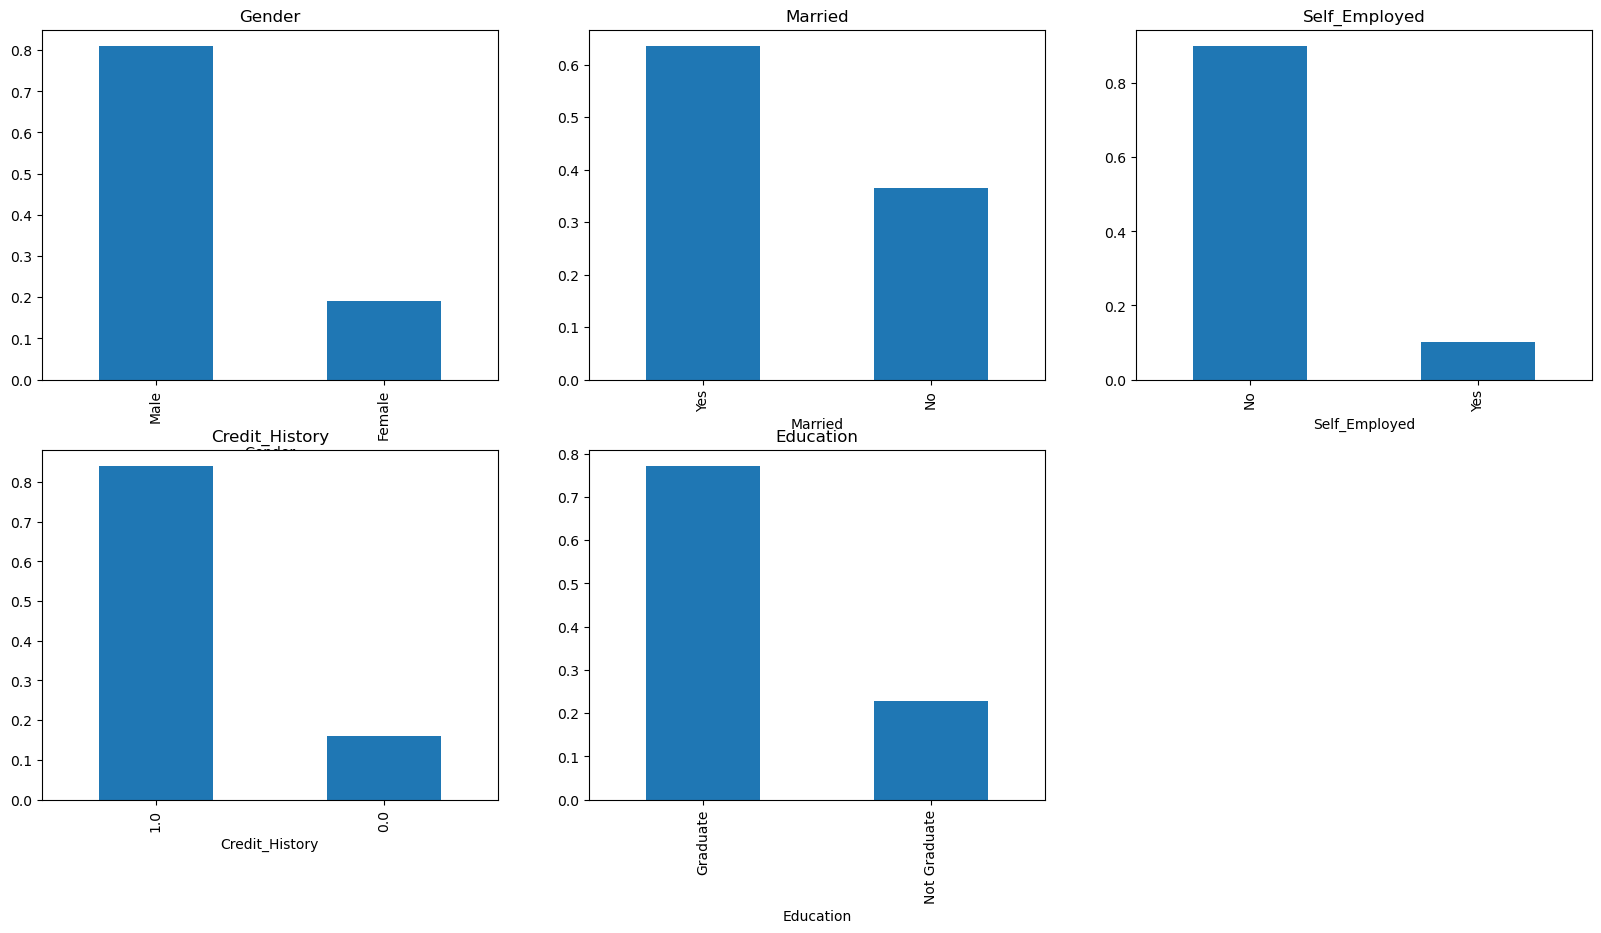

In [68]:
plt.subplot(231)
dt['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
dt['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
dt['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
dt['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
dt['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

<Axes: xlabel='Loan_Status'>

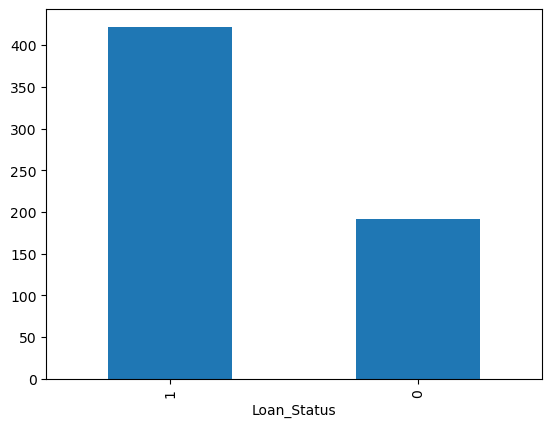

In [69]:
# bar plot to visualize the frequency
df['Loan_Status'].value_counts().plot.bar()

In [70]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

Loan_Status   0    1
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


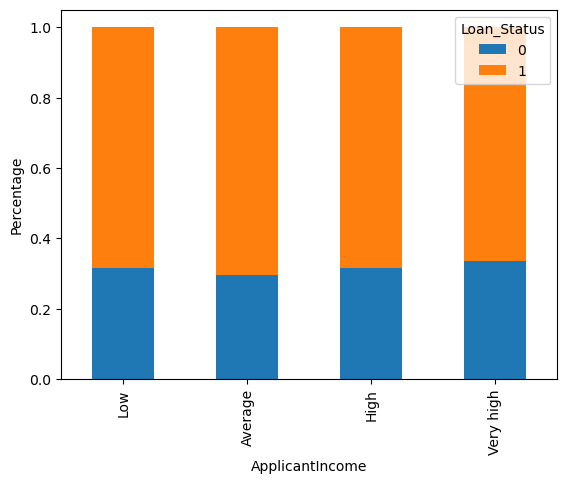

In [71]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [72]:
df.isnull().sum()*100/len(df)

Dependents                 0.0
ApplicantIncome            0.0
CoapplicantIncome          0.0
LoanAmount                 0.0
Loan_Amount_Term           0.0
Credit_History             0.0
Loan_Status                0.0
Gender_Female              0.0
Gender_Male                0.0
Married_No                 0.0
Married_Yes                0.0
Education_Graduate         0.0
Education_Not Graduate     0.0
Property_Area_Rural        0.0
Property_Area_Semiurban    0.0
Property_Area_Urban        0.0
Self_Employed_No           0.0
Self_Employed_Yes          0.0
Income_bin                 0.0
dtype: float64

In [73]:
dt['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [92]:
dt['Gender']=dt['Gender'].map({'Male':1,'Female':0}).astype('int64')
dt['Married']=dt['Married'].map({'Yes':1,'No':0}).astype('int64')
dt['Education']=dt['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
dt['Self_Employed']=dt['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
dt['Property_Area']=dt['Property_Area'].map({'Urban':1,'Rural':0,'Semiurban':2}).astype('int')

In [93]:
dt

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predction
0,1015,1,1,0.0,1,0,5720,0,146.412162,360.0,1.0,1,1
1,1022,1,1,1.0,1,0,3076,1500,128.000000,360.0,1.0,1,1
2,1031,1,1,2.0,1,0,5000,1800,66.000000,360.0,1.0,1,1
3,1035,1,1,2.0,1,0,2340,2546,120.000000,360.0,1.0,1,1
4,1051,1,0,0.0,0,0,3276,0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3.0,0,1,4009,1777,130.000000,360.0,1.0,1,1
363,2975,1,1,0.0,1,0,4158,709,95.000000,360.0,1.0,1,1
364,2980,1,0,0.0,1,0,3250,1993,141.000000,360.0,1.0,2,1
365,2986,1,1,0.0,1,0,5000,2393,133.000000,360.0,1.0,0,1


In [94]:
x=dt.drop('Predction',axis=1)

In [95]:
dt.isnull().sum()*100/len(dt)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Predction            0.0
dtype: float64

In [96]:
dt['Loan_ID'].fillna(dt['Loan_ID'].mode()[0],inplace=True)

In [97]:
y=dt['Predction']

In [98]:
dt.Loan_ID=dt.Loan_ID.replace(['LP'],'',regex=True).astype('int64')

In [99]:
rf=RandomForestClassifier(n_estimators=270,min_samples_split=5,
                         min_samples_leaf=5,max_features='sqrt',max_depth=5)

In [100]:
rf

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [101]:
cols=['ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','LoanAmount']

In [102]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x[cols]=st.fit_transform(x[cols])

In [103]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1015,1,1,0.0,1,0,0.186461,-0.673335,0.014164,0.266022,1.0,1
1,1022,1,1,1.0,1,0,-0.352692,-0.029848,-0.209724,0.266022,1.0,1
2,1031,1,1,2.0,1,0,0.039641,0.098849,-0.963633,0.266022,1.0,1
3,1035,1,1,2.0,1,0,-0.502774,0.418877,-0.307003,0.266022,1.0,1
4,1051,1,0,0.0,0,0,-0.311909,-0.673335,-0.051647,0.266022,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362,2971,1,1,3.0,0,1,-0.162439,0.088982,-0.185405,0.266022,1.0,1
363,2975,1,1,0.0,1,0,-0.132056,-0.369180,-0.610998,0.266022,1.0,1
364,2980,1,0,0.0,1,0,-0.317211,0.181644,-0.051647,0.266022,1.0,2
365,2986,1,1,0.0,1,0,0.039641,0.353241,-0.148925,0.266022,1.0,0


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [105]:
model_df={}
def model_val(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                                  random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model}accuracy is {accuracy_score(y_test,y_pred)}")
    
    score=cross_val_score(model,x,y,cv=5)
    print(f"{model}Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":['liblinear']}

In [108]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,cv=5,verbose=True)

In [109]:
rs_log_reg.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)